In [1]:
library("here")
library(devtools)
library(Seurat)

load_all('/home/jpm73279/Socrates')

here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Loading required package: usethis

Attaching SeuratObject

ℹ Loading Socrates
Loading required package: cicero

Loading required package: monocle

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignette

# Files to Be Analyzed (by Plates and Reps)

Uro_P1.rep1.unique.tn5.bed
Uro_P1.rep2.unique.tn5.bed
Uro_P2.rep1.unique.tn5.bed
Uro_P2.rep2.unique.tn5.bed
Uro_P3.rep1.unique.tn5.bed
Uro_P3.rep2.unique.tn5.bed
Uro_P4.rep1.unique.tn5.bed
Uro_P4.rep2.unique.tn5.bed
Uro_P5.rep1.unique.tn5.bed
Uro_P5.rep2.unique.tn5.bed
Uro_P6.rep1.unique.tn5.bed
Uro_P6.rep2.unique.tn5.bed
Uro_P7.rep1.unique.tn5.bed
Uro_P7.rep2.unique.tn5.bed
Uro_P8.rep1.unique.tn5.bed
Uro_P8.rep2.unique.tn5.bed
Uro_T1.rep1.unique.tn5.bed
Uro_T1.rep2.unique.tn5.bed
Uro_T2.rep1.unique.tn5.bed
Uro_T2.rep2.unique.tn5.bed

#### First File: Uro_P1.rep1.unique.tn5.bed


In [3]:
# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Ufusca/v1.1/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/urochlea_fusca.snake/03.bed_files_merged/"

Uro_P1.rep1 <- paste0(analysis_path, "urochlea_fusca.rep_1.filter.mpq_10.rmdup.unique.sorted.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"annotation/Ufusca_669_v1.1.gene.gff3")
chr <- paste0(reference_genome_path,"assembly/Ufusca_669_v1.0.chrom.size")
pre <- "Uro_P1.rep1"

In [4]:
#Load Object
Uro_P1.leaf.rep1 <- loadBEDandGenomeData(Uro_P1.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/urochlea_fusca.snake/03.bed_files_merged/urochlea_fusca.rep_1.filter.mpq_10.rmdup.unique.sorted.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Ufusca/v1.1/annotation/Ufusca_669_v1.1.gene.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Ufusca/v1.1/assembly/Ufusca_669_v1.0.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...

 - finished loading data



In [5]:
Uro_P1.leaf.rep1.no_organelle <- countRemoveOrganelle(Uro_P1.leaf.rep1, 
                                             org_scaffolds = c("NC_030617.1"), 
                                             remove_reads = TRUE)

Identified 2928708 organeller reads ...



In [6]:
# call ACRs
sb_temp_dir <- paste0(analysis_path, "Uro_P1.leaf.rep1.tmp")
Uro_P1.leaf.rep1.acrs <- callACRs(Uro_P1.leaf.rep1.no_organelle, genomesize=4.17e7,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

 - running MACS2 on bulk BED file ...



In [8]:
Uro_P1.leaf.rep1.meta <- buildMetaData(Uro_P1.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...



In [ ]:
library(repr)

options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=15000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=NULL)


In [9]:
# generate sparse matrix
Uro_P1.leaf.rep1.meta_file.filtered <- generateMatrix(Uro_P1.leaf.rep1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            blacklist="/home/jpm73279/genome_downloads/Ufusca/Uf.cell_cycle_orthos.markers.bed",
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

In [12]:
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/"

pre <- "Uro_P1.rep1"
# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Uro_P1.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Uro_P1.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

 - converting triplet format to sparseMatrix



## Plate: Uro_P1.rep2.unique.tn5.bed

In [ ]:
Uro_P1.rep1 <- paste0(analysis_path, "Uro_P1.rep2.unique.tn5.bed")

ann <- paste0(reference_genome_path,"annotation/Ufusca_669_v1.1.gene.gff3")
chr <- paste0(reference_genome_path,"assembly/Ufusca_669_v1.0.chrom.size")
pre <- "Uro_P1.rep2"



#Load Object
Uro_P1.leaf.rep1 <- loadBEDandGenomeData(Uro_P1.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

# call ACRs
sb_temp_dir <- paste0(analysis_path, paste0(pre, "peaks.tmp"))
Uro_P1.leaf.rep1.acrs <- callACRs(Uro_P1.leaf.rep1, genomesize=4.17e7,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Uro_P1.leaf.rep1.meta <- buildMetaData(Uro_P1.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)


library(repr)

options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=1500,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=NULL)

# generate sparse matrix
Uro_P1.leaf.rep1.meta_file.filtered <- generateMatrix(Uro_P1.leaf.rep1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)

output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/"
# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Uro_P1.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Uro_P1.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)



Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Urochloa_fusca/Uro_P2.rep1.unique.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Ufusca/v1.1/annotation/Ufusca_669_v1.1.gene.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Ufusca/v1.1/assembly/Ufusca_669_v1.0.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...

Making Dotplot

 - converting triplet format to sparseMatrix



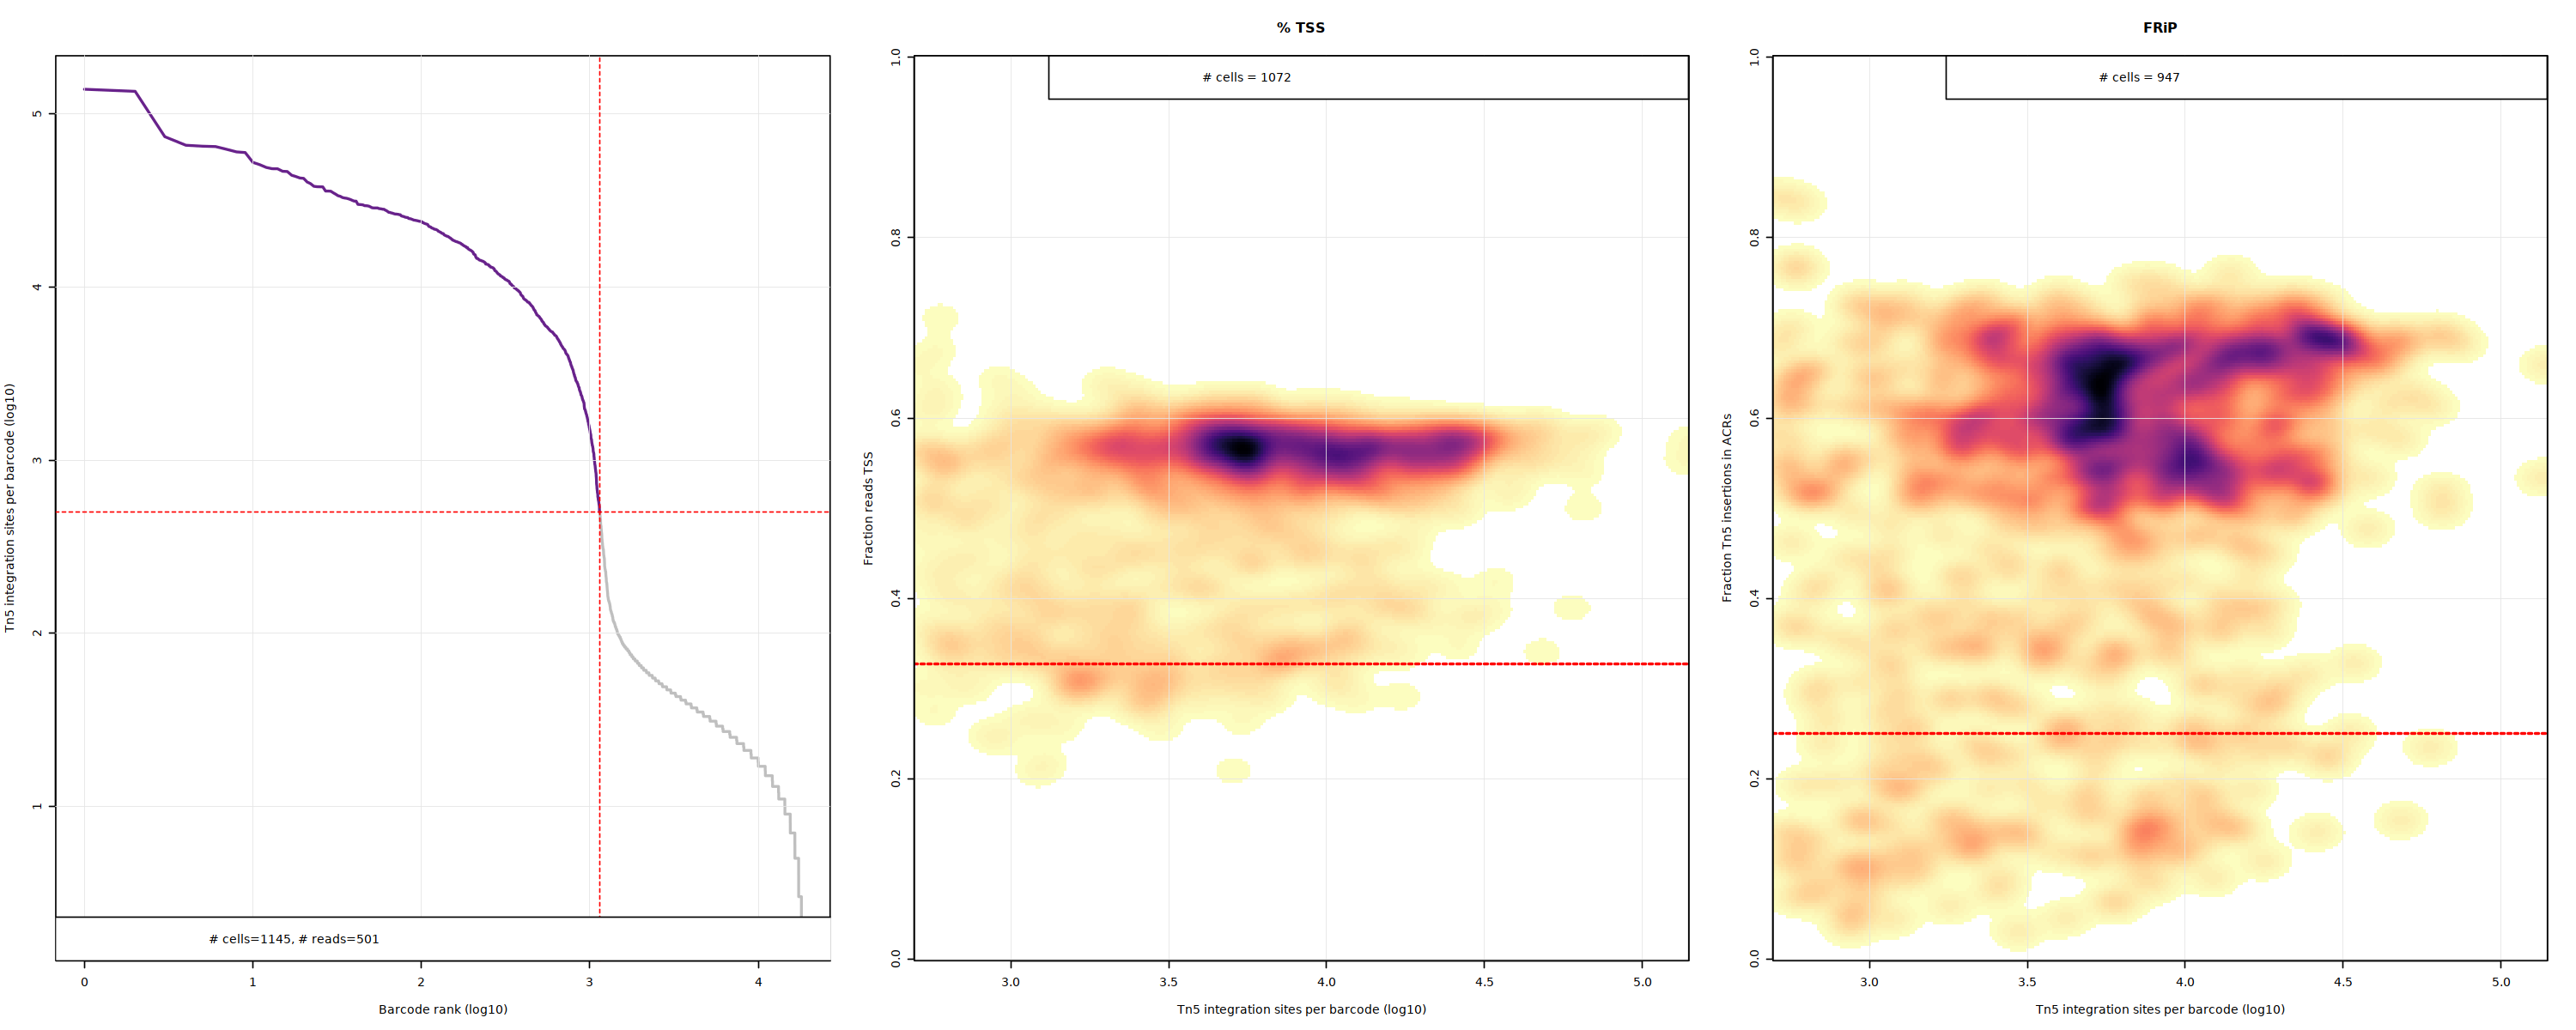

In [15]:
Uro_P1.rep1 <- paste0(analysis_path, "Uro_P2.rep1.unique.tn5.bed")

ann <- paste0(reference_genome_path,"annotation/Ufusca_669_v1.1.gene.gff3")
chr <- paste0(reference_genome_path,"assembly/Ufusca_669_v1.0.chrom.size")
pre <- "Uro_P2.rep1"



#Load Object
Uro_P1.leaf.rep1 <- loadBEDandGenomeData(Uro_P1.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

# call ACRs
sb_temp_dir <- paste0(analysis_path, paste0(pre, "peaks.tmp"))
Uro_P1.leaf.rep1.acrs <- callACRs(Uro_P1.leaf.rep1, genomesize=4.17e7,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Uro_P1.leaf.rep1.meta <- buildMetaData(Uro_P1.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)


library(repr)

options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=10000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=NULL)

# generate sparse matrix
Uro_P1.leaf.rep1.meta_file.filtered <- generateMatrix(Uro_P1.leaf.rep1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)

output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/"
# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Uro_P1.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Uro_P1.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)



### For Loop Time...

Okay - this is taking some time, and would be an insane amount of copy and paste. Rather I think I'm just going to forloop this for the rest of these files, and write the QC image to an output. This should be enough for me to go back and then just start either -1 adapting the filters based off of specified plates, or 2 - indicate that a plate is performing far worse. 

In [4]:
remaining_files_list <- list("Uro_P1.rep1", 
                             "Uro_P1.rep2", "Uro_P2.rep2","Uro_P3.rep1","Uro_P3.rep2","Uro_P4.rep1","Uro_P4.rep2","Uro_P5.rep1","Uro_P5.rep2","Uro_P6.rep1","Uro_P6.rep2","Uro_P7.rep1","Uro_P7.rep2","Uro_P8.rep1","Uro_P8.rep2","Uro_T1.rep1","Uro_T1.rep2","Uro_T2.rep1","Uro_T2.rep2")

reference_genome_path <- "/home/jpm73279/genome_downloads/Ufusca/v1.1/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Urochloa_fusca/"



for (i in remaining_files_list) {
    
Uro_P1.rep1 <- paste0(analysis_path, paste0(i,".unique.tn5.bed"))
ann <- paste0(reference_genome_path,"annotation/Ufusca_669_v1.1.gene.gff3")
chr <- paste0(reference_genome_path,"assembly/Ufusca_669_v1.0.chrom.size")
pre <- i


output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/"
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/QC_output/imgs/"
    
#Load Object
Uro_P1.leaf.rep1 <- loadBEDandGenomeData(Uro_P1.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

# call ACRs
sb_temp_dir <- paste0(analysis_path, paste0(pre, "peaks.tmp"))
Uro_P1.leaf.rep1.acrs <- callACRs(Uro_P1.leaf.rep1, genomesize=2.8e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Uro_P1.leaf.rep1.meta <- buildMetaData(Uro_P1.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)



options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=1500,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=paste0(output_path_imgs, pre))

# generate sparse matrix
Uro_P1.leaf.rep1.meta_file.filtered <- generateMatrix(Uro_P1.leaf.rep1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)


# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Uro_P1.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Uro_P1.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)
    
}


Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Urochloa_fusca/Uro_P1.rep1.unique.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Ufusca/v1.1/annotation/Ufusca_669_v1.1.gene.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Ufusca/v1.1/assembly/Ufusca_669_v1.0.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Urochloa_fusca/Uro_P1.rep1peaks.tmp' already exists"
 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...

Making Dotplot

 - converting triplet format to sparseMatrix


GFF file path = /home/jpm73279/genome_downloads/Ufusca/v1.1/annotation/Ufusca_669_v1.1.gene.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Ufusca/v1.1/assembly/Ufusca_669_v1.0.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Urochloa_fusca/Uro_P5.rep2peaks.tmp' already exists"
 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...

Making Dotplot

 - converting triplet format to sparseMatrix

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Urochloa_fusca/Uro_P6.rep1.unique.tn5.bed ... ok


Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Urochloa_fusca/Uro_T1.rep2peaks.tmp' already exists"
 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...

Making Dotplot

 - converting triplet format to sparseMatrix

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Urochloa_fusca/Uro_T2.rep1.unique.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Ufusca/v1.1/annotation/Ufusca_669_v1.1.gene.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Ufusca/v1.1/assembly/Ufusca_669_v1.0.chrom.size ... ok


## Get other Meta information for Each Plate

In [6]:
remaining_files_list <- list("Uro_P1.rep1","Uro_P1.rep2","Uro_P2.rep1","Uro_P2.rep2","Uro_P3.rep1","Uro_P3.rep2","Uro_P4.rep1","Uro_P4.rep2","Uro_P5.rep1","Uro_P5.rep2","Uro_P6.rep1","Uro_P6.rep2","Uro_P7.rep1","Uro_P7.rep2","Uro_P8.rep1","Uro_P8.rep2","Uro_T1.rep1","Uro_T1.rep2","Uro_T2.rep1","Uro_T2.rep2")
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/"

df <- data.frame(matrix(ncol = 5, nrow = 0))
colnames(df)<-c("plate", "mean_total", "mean_tss", "mean_acrs", "mean_nsites")

for (i in remaining_files_list) {
    output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/"

    meta_file_reads <- readRDS(paste0(output_path,"QC_output/",i, "_QC_soc_obj.rds"))
    
    mean_total <- (mean(meta_file_reads$meta$total))
    mean_tss <- (mean(meta_file_reads$meta$tss))
    mean_acrs <- mean(meta_file_reads$meta$acrs)
    mean_nSites <- mean(meta_file_reads$meta$nSites)

    combined_row <- c(i, mean_total, mean_tss, mean_acrs, mean_nSites)
    df <- rbind(df,combined_row)

}

In [7]:
df

X.Uro_P1.rep1.,X.9841.62666666667.,X.5367.17948717949.,X.7578.02461538462.,X.4823.30974358974.
<chr>,<chr>,<chr>,<chr>,<chr>
Uro_P1.rep1,9841.62666666667,5367.17948717949,7578.02461538462,4823.30974358974
Uro_P1.rep2,9696.30131445905,5306.29929221436,7516.91304347826,4668.93124368049
Uro_P2.rep1,10177.5258711721,5610.88489968321,6084.15628299894,4902.06546990496
Uro_P2.rep2,10439.6690140845,5785.02414486921,8186.10563380282,4879.47283702213
Uro_P3.rep1,14696.212406015,8024.31390977444,11182.7904135338,6818.09022556391
Uro_P3.rep2,15063.4188817599,8293.40788267644,11703.8597616865,6727.5609532539
Uro_P4.rep1,13325.9629310345,7334.48965517241,10344.6568965517,6102.1724137931
Uro_P4.rep2,14675.7411674347,8140.53072196621,11672.5407066052,6436.06374807988
Uro_P5.rep1,14414.7003929273,7877.89096267191,10949,6746.90864440079


## Process Merged Replicates 4/17/2023

In [2]:

reference_genome_path <- "/home/jpm73279/genome_downloads/Ufusca/v1.1/"
#analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Urochloa_fusca/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/urochlea_fusca.snake/03.bed_files_merged/"

Uro_P1.rep1 <- paste0(analysis_path, "urochlea_fusca.rep_1.filter.mpq_10.rmdup.unique.sorted.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"annotation/Ufusca_669_v1.1.gene.gff3")
chr <- paste0(reference_genome_path,"assembly/Ufusca_669_v1.0.Pt.sizes")
pre <- "Uro_fusca.sciATAC_rep1"



#Load Object
Uro_P1.leaf.rep1 <- loadBEDandGenomeData(Uro_P1.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/urochlea_fusca.snake/03.bed_files_merged/urochlea_fusca.rep_1.filter.mpq_10.rmdup.unique.sorted.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Ufusca/v1.1/annotation/Ufusca_669_v1.1.gene.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Ufusca/v1.1/assembly/Ufusca_669_v1.0.Pt.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...

 - finished loading data



In [3]:
Uro_P1.leaf.rep1.no_organelle <- countRemoveOrganelle(Uro_P1.leaf.rep1, 
                                             org_scaffolds = c("NC_030617.1"), 
                                             remove_reads = TRUE)

# call ACRs
sb_temp_dir <- paste0(analysis_path, "Uro_P1.leaf.rep1.tmp")
Uro_P1.leaf.rep1.acrs <- callACRs(Uro_P1.leaf.rep1.no_organelle, 
                genomesize=4.17e7,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Identified 2928708 organeller reads ...

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/urochlea_fusca.snake/03.bed_files_merged/Uro_P1.leaf.rep1.tmp' already exists"


In [4]:
Uro_P1.leaf.rep1.meta <- buildMetaData(Uro_P1.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



Warning message:
"package 'repr' was built under R version 4.2.1"
Making Dotplot

... Filtering Cells based of Oragnelle Reads



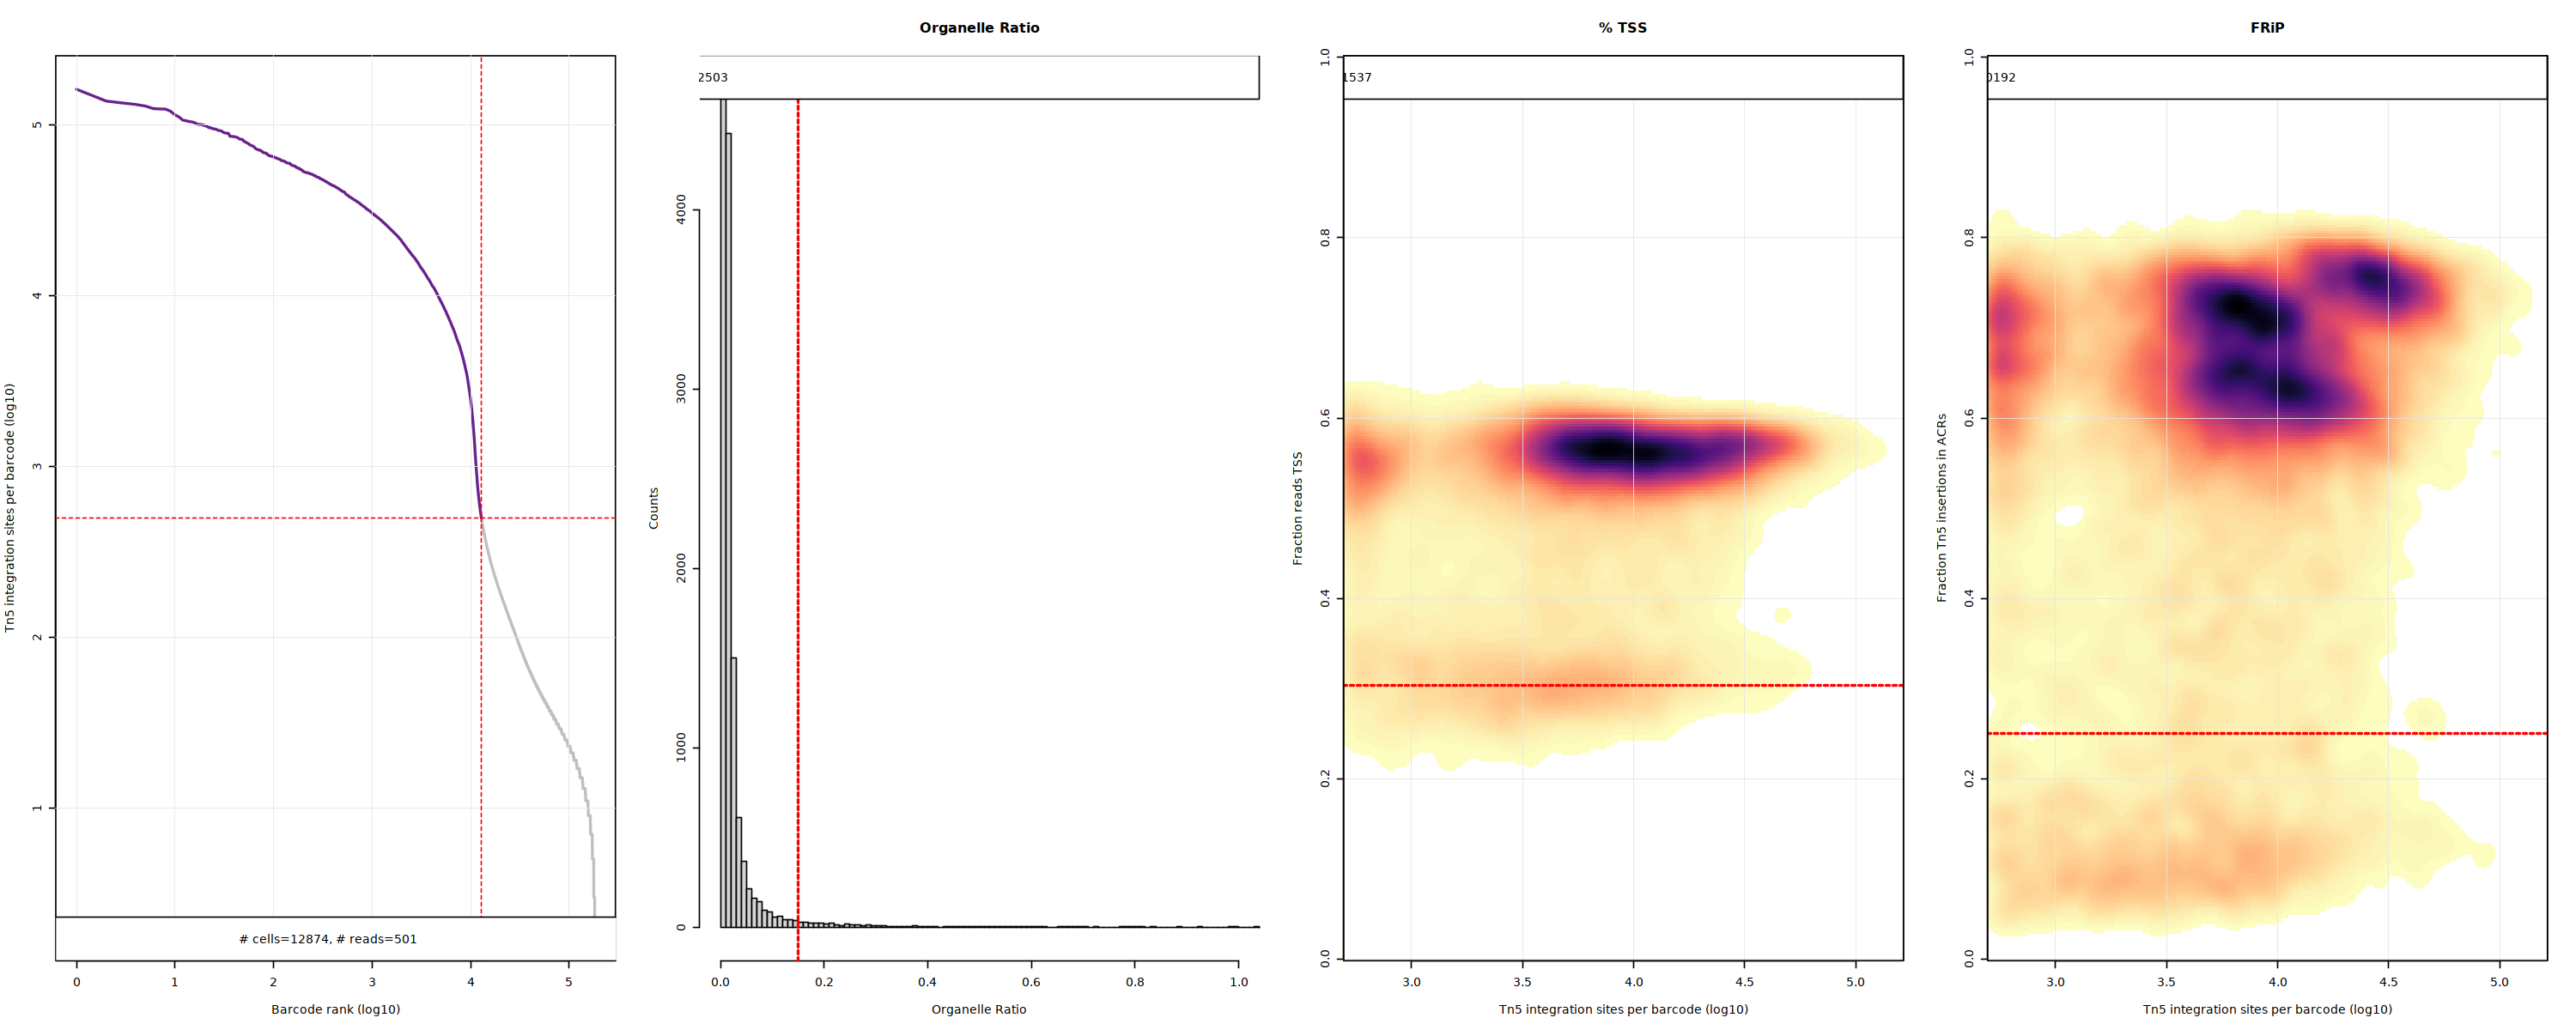

In [5]:
library(repr)
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/QC_output/imgs/"

options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=15000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = TRUE,
                                        org.filter.thresh=0.15,
                                        prefix=NULL)


In [6]:
library(repr)
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/QC_output/imgs/"
pre <- "Uro_fusca.sciATAC_rep1"


options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=15000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = TRUE,
                                        org.filter.thresh=0.15,
                                        prefix=paste0(output_path_imgs, pre))


Making Dotplot

... Filtering Cells based of Oragnelle Reads



In [7]:
# generate sparse matrix
Uro_P1.leaf.rep1.meta_file.filtered <- generateMatrix(Uro_P1.leaf.rep1.meta_file,
                            filtered=FALSE,
                            windows=500,
                            peaks=F,
                            blacklist="/home/jpm73279/genome_downloads/Ufusca/Uf.cell_cycle_orthos.markers.bed",
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

In [8]:
#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

Uro_P1.leaf.rep1.meta_file.filtered <- isCell(Uro_P1.leaf.rep1.meta_file.filtered,
      num.ref = 5000, verbose = TRUE)

 - converting triplet format to sparseMatrix

 - setting filters

 - parsing initial boundaries

 - normalizing distributions and creating references

 - performing feature selection (this step is a bottle-neck and may take a while to complete)

 - estimating correlations



In [10]:
#save_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output"
library(tidyverse)
passing_cells <- Uro_P1.leaf.rep1.meta_file.filtered$meta  %>% 
    dplyr::filter(is_cell == 1)



Uro_P1.leaf.rep1.meta_file.filtered$meta.v3 <- passing_cells
    

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1          ✔ readr     2.1.4     
✔ forcats   1.0.0.9000     ✔ stringr   1.5.0     
✔ lubridate 1.9.2          ✔ tibble    3.2.1     
✔ purrr     1.0.1          ✔ tidyr     1.3.0     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ purrr::accumulate()   masks foreach::accumulate()
✖ readr::col_factor()   masks Socrates::col_factor(), scales::col_factor()
✖ dplyr::collapse()     masks IRanges::collapse()
✖ dplyr::combine()      masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()        masks matrixStats::count()
✖ dplyr::desc()       

In [ ]:
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/"
pre <- "Uro_fusca.sciATAC_rep1"

# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Uro_P1.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Uro_P1.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

 - converting triplet format to sparseMatrix



In [37]:
sum(Uro_P1.leaf.rep1.meta_file.filtered$meta$ptmt < 2)

[1] 92497

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
library("dplyr")
Uro_P1.leaf.rep1.meta_file.filtered$meta  %>% 
    dplyr::mutate(prop_ptmt = ptmt/total)  %>% 
    ggplot(., aes(prop_ptmt)) + geom_histogram(binwidth = 1)

### Working on second replicate

In [ ]:

reference_genome_path <- "/home/jpm73279/genome_downloads/Ufusca/v1.1/"
#analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/Urochloa_fusca/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/urochlea_fusca.snake/03.bed_files_merged/"

Uro_P1.rep2 <- paste0(analysis_path, "urochlea_fusca.rep_2.filter.mpq_10.rmdup.unique.sorted.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep2"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"annotation/Ufusca_669_v1.1.gene.gff3")
chr <- paste0(reference_genome_path,"assembly/Ufusca_669_v1.0.Pt.sizes")
pre <- "Uro_fusca.sciATAC_rep2"



#Load Object
Uro_P1.leaf.rep2 <- loadBEDandGenomeData(Uro_P1.rep2, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Uro_P1.leaf.rep2.no_organelle <- countRemoveOrganelle(Uro_P1.leaf.rep2, 
                                             org_scaffolds = c("NC_030617.1"), 
                                             remove_reads = TRUE)

# call ACRs
sb_temp_dir <- paste0(analysis_path, "Uro_P1.leaf.rep2.tmp")
Uro_P1.leaf.rep2.acrs <- callACRs(Uro_P1.leaf.rep2.no_organelle, 
                genomesize=4.17e7,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Uro_P1.leaf.rep2.meta <- buildMetaData(Uro_P1.leaf.rep2.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)

library(repr)
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/QC_output/imgs/"

options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep2.meta_file <- findCells(Uro_P1.leaf.rep2.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=15000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = TRUE,
                                        org.filter.thresh=0.15,
                                        prefix=NULL)


library(repr)
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/QC_output/imgs/"
pre <- "Uro_fusca.sciATAC_rep2"


options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep2.meta_file <- findCells(Uro_P1.leaf.rep2.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=15000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = TRUE,
                                        org.filter.thresh=0.15,
                                        prefix=paste0(output_path_imgs, pre))




# generate sparse matrix
Uro_P1.leaf.rep2.meta_file.filtered <- generateMatrix(Uro_P1.leaf.rep2.meta_file,
                            filtered=FALSE,
                            windows=500,
                            peaks=F,
                            blacklist="/home/jpm73279/genome_downloads/Ufusca/Uf.cell_cycle_orthos.markers.bed",
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

Uro_P1.leaf.rep2.meta_file.filtered <- isCell(Uro_P1.leaf.rep2.meta_file.filtered,
      num.ref = 5000, verbose = TRUE)

#save_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output"

passing_cells <- Uro_P1.leaf.rep2.meta_file.filtered$meta  %>% 
    dplyr::filter(is_cell == 1)



Uro_P1.leaf.rep2.meta_file.filtered$meta.v3 <- passing_cells
    

output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/urochloa_fusc/"
pre <- "Uro_fusca.sciATAC_rep2"

# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Uro_P1.leaf.rep2.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Uro_P1.leaf.rep2.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

In [ ]:
head(Uro_P1.leaf.rep2.meta_file.filtered)